In [2]:
import importlib
import numpy as np
import dct
import timeit
import math
import time
importlib.reload(dct)
import matplotlib as plt
plt.rcParams['figure.dpi'] = 180


# Initial Tests

In [3]:
f = [231, 32, 233, 161, 24, 71, 140, 245]
f2d = [
    [231, 32, 233, 161, 24, 71, 140, 245],
    [247, 40, 248, 245, 124, 204, 36, 107],
    [234, 202, 245, 167, 9, 217, 239, 173],
    [193, 190, 100, 167, 43, 180, 8, 70],
    [11, 24, 210, 177, 81, 243, 8, 112],
    [97, 195, 203, 47, 125, 114, 165, 181],
    [193, 70, 174, 167, 41, 30, 127, 245],
    [87, 149, 57, 192, 65, 129, 178, 228]
]
f2d

[[231, 32, 233, 161, 24, 71, 140, 245],
 [247, 40, 248, 245, 124, 204, 36, 107],
 [234, 202, 245, 167, 9, 217, 239, 173],
 [193, 190, 100, 167, 43, 180, 8, 70],
 [11, 24, 210, 177, 81, 243, 8, 112],
 [97, 195, 203, 47, 125, 114, 165, 181],
 [193, 70, 174, 167, 41, 30, 127, 245],
 [87, 149, 57, 192, 65, 129, 178, 228]]

In [4]:
dct.dct(f)

[401.9902051045523,
 6.600019905532548,
 109.16736544429627,
 -112.78557857175124,
 65.40737725975556,
 121.83139803666808,
 116.65648855486545,
 28.800407217830443]

In [16]:
dct.fdct(f)

array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

In [14]:
c2 = np.matrix(dct.dct2(f2d))
c2t = np.matrix(dct.dct2t(f2d))
fc2t = np.matrix(dct.fdct2t(f2d))
print(np.allclose(c2, fc2t))
print(np.allclose(c2, c2t))
print(np.allclose(fc2t, c2t))

True
True
True


# 2D DCT

In [19]:
%%timeit -n 1000
# NOSTRA DCT PRIMA RIGA POI COLONNA
dct.dct2t(f2d)

390 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%%timeit -n 1000
# NOSTRA DCT 2D
dct.dct2(f2d)

2.46 ms ± 75.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%%timeit -n 1000
# DCT SCIPY PRIMA RIGA POI COLONNA
dct.fdct2t(f2d)

46.1 µs ± 9.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%%timeit -n  1000
# MAGIC DCT 2d 8x8
dct.mdct2t(f2d)

88.7 µs ± 7.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 1D DCT

In [111]:
f = [231, 32, 233, 161, 24, 71, 140, 245]

In [112]:
%%timeit -n 10000
# nostra DCT
dct.dct(f)

25.4 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [113]:
%%timeit -n 10000
# DCT scipy
dct.fdct(f)

18.5 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [114]:
%%timeit -n 10000
# magic DCT solo dimensione 8
dct.mdct(f)

5.6 µs ± 541 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
from collections import defaultdict
n = 250
ns = list(range(1,n))
times_1d = defaultdict(list)
matrix = np.random.rand(n).tolist()
for dctm in [dct.dct, dct.fdct]:
    for n in ns:
        f_name = dctm.__name__
        tm = matrix[:n]
        start_t = time.time()
        dctm(tm)
        end_t = time.time()
        elapsed_t =  end_t - start_t
        times_1d[f_name].append(elapsed_t)
        print(f_name + ";" + str(n) + ";" + str(elapsed_t))

dct;1;9.298324584960938e-06
dct;2;1.2159347534179688e-05
dct;3;1.049041748046875e-05
dct;4;1.1682510375976562e-05
dct;5;1.52587890625e-05
dct;6;1.8596649169921875e-05
dct;7;4.076957702636719e-05
dct;8;3.0517578125e-05
dct;9;3.457069396972656e-05
dct;10;4.029273986816406e-05
dct;11;4.696846008300781e-05
dct;12;5.459785461425781e-05
dct;13;6.222724914550781e-05
dct;14;7.009506225585938e-05
dct;15;7.963180541992188e-05
dct;16;8.96453857421875e-05
dct;17;0.00010085105895996094
dct;18;0.00013065338134765625
dct;19;0.00012421607971191406
dct;20;0.0001735687255859375
dct;21;0.00015020370483398438
dct;22;0.00016427040100097656
dct;23;0.00025177001953125
dct;24;0.00019741058349609375
dct;25;0.00020885467529296875
dct;26;0.00022792816162109375
dct;27;0.0002415180206298828
dct;28;0.00025844573974609375
dct;29;0.0002779960632324219
dct;30;0.00029349327087402344
dct;31;0.0003364086151123047
dct;32;0.00033211708068847656
dct;33;0.0004076957702636719
dct;34;0.0003833770751953125
dct;35;0.000400304794

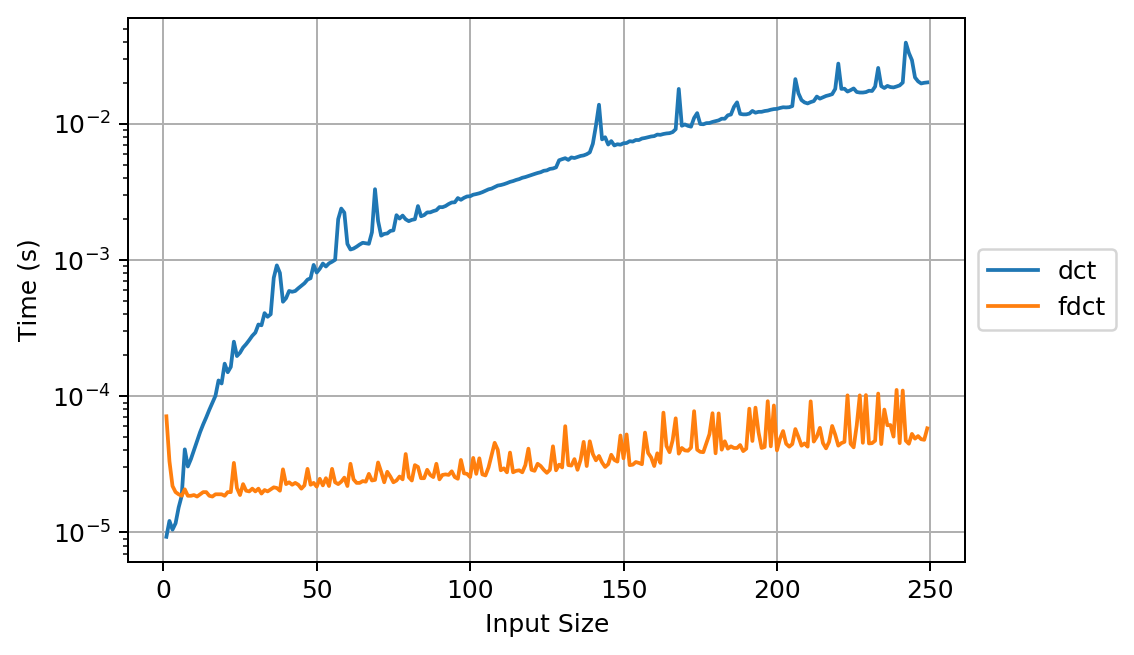

In [18]:
import matplotlib.pyplot as plt

names = times_1d.keys()
legend = []
labels = []
for name in names:
    legend.append(plt.plot(ns, times_1d[name], alpha=1)[0])
    labels.append(name)

"""n2 = [(n**2)/200000 * math.log(n) for n in ns]
legend.append(plt.plot(ns, n2,linestyle="--", color="k")[0])
labels.append("$n^2\ \log(n)$")

n3 = [n**2.6/200000 for n in ns]
legend.append(plt.plot(ns, n3, linestyle="--", color="k")[0])
labels.append("$n^3$")"""

plt.grid(True)
plt.yscale("log")
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.legend(legend, labels, loc='center left', bbox_to_anchor=(1, 0.5))


"""pf = np.poly1d(np.polyfit(ns, times_1d['dct'], 3))
plt.plot(ns, pf(ns), color='b')
pf = np.poly1d(np.polyfit(ns, times_1d['fdct'], 3))
plt.plot(ns, pf(ns), color='red')"""
plt.show()

# Benchmark 2D

In [3]:
from collections import defaultdict
ns = list(range(1,2**6))
times = defaultdict(list)
for dctm in [dct.dct2t, dct.fdct2t, dct.dct2]:
    for n in ns:
        f_name = dctm.__name__
        matrix = np.random.rand(n,n).tolist()
        start_t = time.time()
        dctm(matrix)
        end_t = time.time()
        elapsed_t =  end_t - start_t
        times[f_name].append(elapsed_t)
        print(f_name + ";" + str(n) + ";" + str(elapsed_t))
    del matrix

dct2t;1;2.3126602172851562e-05
dct2t;2;3.719329833984375e-05
dct2t;3;4.506111145019531e-05
dct2t;4;6.985664367675781e-05
dct2t;5;0.000118255615234375
dct2t;6;0.00018548965454101562
dct2t;7;0.00027823448181152344
dct2t;8;0.0006039142608642578
dct2t;9;0.0005564689636230469
dct2t;10;0.0008487701416015625
dct2t;11;0.001031637191772461
dct2t;12;0.0013270378112792969
dct2t;13;0.0016722679138183594
dct2t;14;0.0021364688873291016
dct2t;15;0.0024962425231933594
dct2t;16;0.0029230117797851562
dct2t;17;0.0036134719848632812
dct2t;18;0.007557392120361328
dct2t;19;0.007400989532470703
dct2t;20;0.005280733108520508
dct2t;21;0.009511470794677734
dct2t;22;0.006834745407104492
dct2t;23;0.010827779769897461
dct2t;24;0.010713577270507812
dct2t;25;0.009882926940917969
dct2t;26;0.010972023010253906
dct2t;27;0.012696266174316406
dct2t;28;0.013864755630493164
dct2t;29;0.015455484390258789
dct2t;30;0.0177001953125
dct2t;31;0.019946575164794922
dct2t;32;0.020087242126464844
dct2t;33;0.022468090057373047
dct2t;

In [4]:
colors = {
    'dct2': '#ff0000',
    'dct2t': '#00ff00',
    'fdct2t': '#0000ff'
}

In [5]:
import matplotlib.pyplot as plt

names = times.keys()
legend = []
labels = []
for name in names:
    legend.append(plt.plot(ns, times[name], color=colors[name])[0])
    labels.append(name)

"""n2 = [(n**2)/200000 * math.log(n) for n in ns]
legend.append(plt.plot(ns, n2,linestyle="--", color="k")[0])
labels.append("$n^2\ \log(n)$")

n3 = [n**2.6/200000 for n in ns]
legend.append(plt.plot(ns, n3, linestyle="--", color="k")[0])
labels.append("$n^3$")"""

plt.grid(True)
plt.yscale("log")
plt.legend(legend, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Time (s)")
plt.xlabel("Input Size ($n \\times n$)")
plt.show()

<Figure size 1152x864 with 1 Axes>

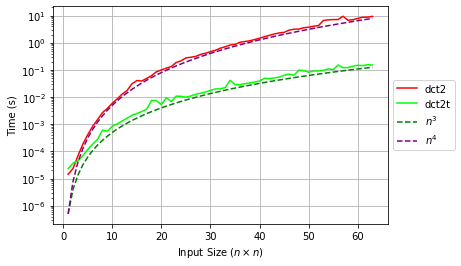

In [6]:
import matplotlib.pyplot as plt

names = ["dct2", "dct2t"]
legend = []
labels = []
for name in names:
    legend.append(plt.plot(ns, times[name], color=colors[name])[0])
    labels.append(name)

"""n2 = [(n**2)/200000 * math.log(n) for n in ns]
legend.append(plt.plot(ns, n2,linestyle="--", color="k")[0])
labels.append("$n^2\ \log(n)$")"""

n3 = [n**3/2000000 for n in ns]
legend.append(plt.plot(ns, n3, linestyle="--", color="green")[0])
labels.append("$n^3$")

n4 = [n**4/2000000 for n in ns]
legend.append(plt.plot(ns, n4, linestyle="--", color="purple")[0])
labels.append("$n^4$")

plt.grid(True)
plt.yscale("log")
plt.legend(legend, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Time (s)")
plt.xlabel("Input Size ($n \\times n$)")
plt.show()

In [8]:
from collections import defaultdict
ns = list(range(1,2**6))
times = defaultdict(list)
for dctm in [dct.dct2t, dct.fdct2t]:
    for n in ns:
        f_name = dctm.__name__
        matrix = np.random.rand(n,n).tolist()
        start_t = time.time()
        dctm(matrix)
        end_t = time.time()
        elapsed_t =  end_t - start_t
        times[f_name].append(elapsed_t)
        print(f_name + ";" + str(n) + ";" + str(elapsed_t))
    del matrix

dct2t;1;2.002716064453125e-05
dct2t;2;2.8371810913085938e-05
dct2t;3;4.076957702636719e-05
dct2t;4;7.081031799316406e-05
dct2t;5;0.00011992454528808594
dct2t;6;0.000186920166015625
dct2t;7;0.00028204917907714844
dct2t;8;0.0006964206695556641
dct2t;9;0.0011610984802246094
dct2t;10;0.000990152359008789
dct2t;11;0.0009794235229492188
dct2t;12;0.0012822151184082031
dct2t;13;0.0016782283782958984
dct2t;14;0.0021507740020751953
dct2t;15;0.002410411834716797
dct2t;16;0.0030879974365234375
dct2t;17;0.0034682750701904297
dct2t;18;0.0056879520416259766
dct2t;19;0.008659839630126953
dct2t;20;0.005205392837524414
dct2t;21;0.005940675735473633
dct2t;22;0.00733494758605957
dct2t;23;0.007930517196655273
dct2t;24;0.008785724639892578
dct2t;25;0.00977325439453125
dct2t;26;0.010831117630004883
dct2t;27;0.012087821960449219
dct2t;28;0.013907194137573242
dct2t;29;0.015572071075439453
dct2t;30;0.01666569709777832
dct2t;31;0.018786191940307617
dct2t;32;0.02106642723083496
dct2t;33;0.02241683006286621
dct2t;

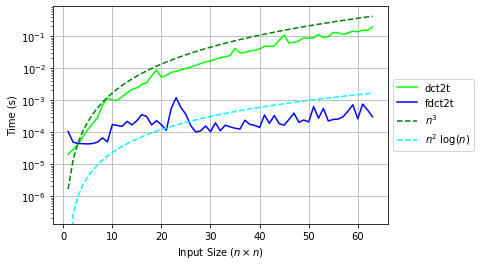

In [9]:
import matplotlib.pyplot as plt

names = times.keys()
legend = []
labels = []
for name in names:
    legend.append(plt.plot(ns, times[name], color=colors[name], alpha=1)[0])
    labels.append(name)

"""n2 = [(n**2)/200000 * math.log(n) for n in ns]
legend.append(plt.plot(ns, n2,linestyle="--", color="k")[0])
labels.append("$n^2\ \log(n)$")

n3 = [n**2.6/200000 for n in ns]
legend.append(plt.plot(ns, n3, linestyle="--", color="k")[0])
labels.append("$n^3$")"""

n3 = [n**3/600000 for n in ns]
legend.append(plt.plot(ns, n3, linestyle="--", color="green")[0])
labels.append("$n^3$")

n2 = [n**2*math.log(n)/10000000 for n in ns]
legend.append(plt.plot(ns, n2, linestyle="--", color="cyan")[0])
labels.append("$n^2\ \log(n)$")

plt.grid(True)
plt.yscale("log")
plt.legend(legend, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Time (s)")
plt.xlabel("Input Size ($n \\times n$)")
plt.show()

# Image Compression

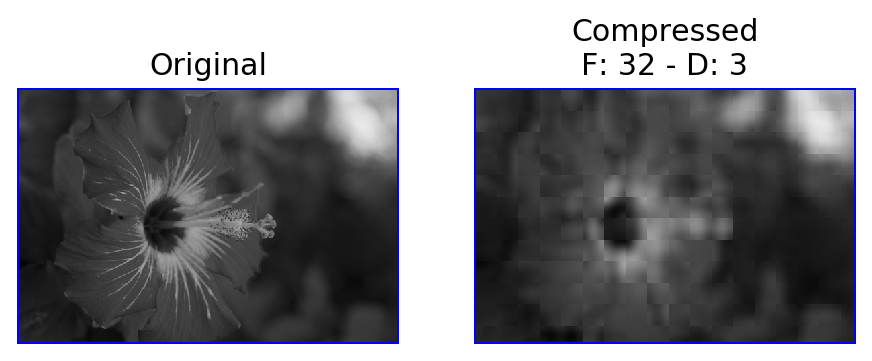

In [6]:
import importlib
import compress
importlib.reload(compress)

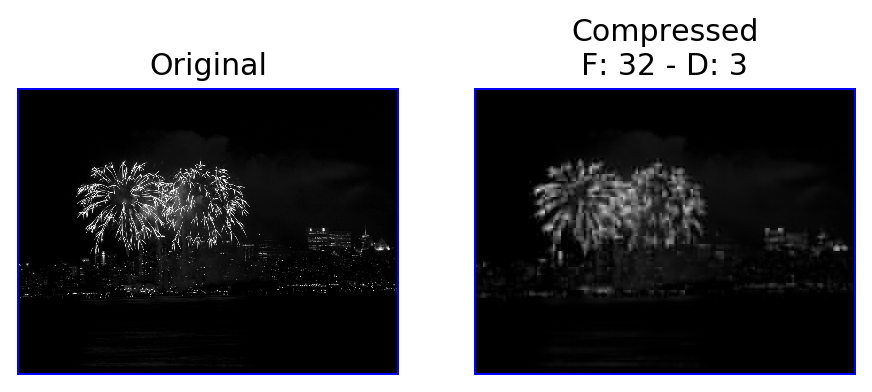

In [7]:
compress.do_compress("images/fireworks.bmp", 32, 3)

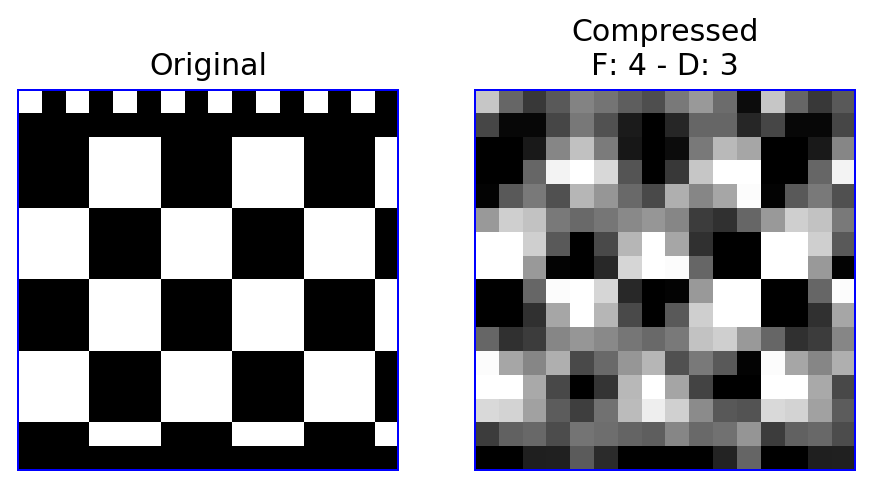

In [9]:
compress.do_compress("images/simple.bmp", 4, 3)